# VGG Net 응용

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg19 = VGG19 ()
vgg19.summary()

574726144/574710816 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [4]:
import numpy as np 
from PIL import Image
from google.colab import files
up = files.upload()     

Saving cat.jpg to cat.jpg


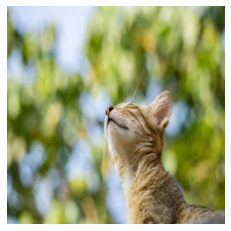

In [5]:
import matplotlib.pyplot as plt

img = Image.open('cat.jpg').resize((224,224))
plt.imshow(img), plt.axis('off');

- 이미지 예측

In [7]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

((1, 1000),
 [[('n02123159', 'tiger_cat', 0.45763105),
   ('n02124075', 'Egyptian_cat', 0.25443012),
   ('n02123045', 'tabby', 0.21205422),
   ('n02127052', 'lynx', 0.02956733),
   ('n02125311', 'cougar', 0.004641845)]])

In [8]:
label[0][0][1], label[0][0][2]

('tiger_cat', 0.45763105)

In [9]:
yhat = vgg19.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tiger_cat', 0.40999758)

- 이미지를 224 x 224 사이즈 자르기

In [10]:
img = Image.open('cat.jpg')
h, w, _ = np.array(img).shape
h, w

(427, 640)

In [11]:
if h > w:
    width, height = 224, (h * 224) // w
else:
    width, height = (w * 224) // h, 224
height, width

(224, 335)

In [12]:
new_img = np.array(img.resize((width,height)))
new_img.shape

(224, 335, 3)

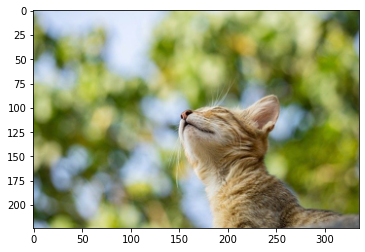

In [13]:
plt.imshow(new_img);

In [14]:
diff = abs(width - height)//2
if width > height:
    final_img = new_img[:, diff:diff+224, :]
else:
    final_img = new_img[diff:diff+224, :, :]
final_img.shape

(224, 224, 3)

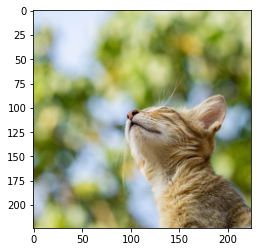

In [15]:
plt.imshow(final_img);

In [16]:
IMAGE_SIZE = 224

def center_image(img):
    h, w, _ = np.array(img).shape
    if h > w:
        width, height = IMAGE_SIZE, (h * IMAGE_SIZE) // w
    else:
        width, height = (w * IMAGE_SIZE) // h, IMAGE_SIZE

    new_img = np.array(img.resize((width,height)))

    diff = abs(width - height)//2
    if width > height:
        final_img = new_img[:, diff:diff+IMAGE_SIZE, :]
    else:
        final_img = new_img[diff:diff+IMAGE_SIZE, :, :]

    return final_img

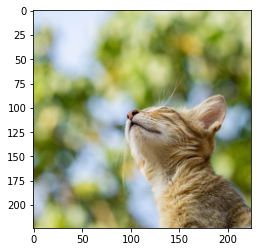

In [17]:
img = Image.open('cat.jpg')
img2 = center_image(img)
plt.imshow(img2);

In [18]:
yhat = vgg16.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('Egyptian_cat', 0.38668847)

In [19]:
yhat = vgg19.predict(np.array(img2).reshape(-1,224,224,3))
label = decode_predictions(yhat)
label[0][0][1], label[0][0][2]

('tiger_cat', 0.39216185)